# **1. 두 변수 간의 상관관계**

* 2개 이상의 양적 변수간에 서로 관계가 있는지 살펴보기 위해서 산포도를 그려보면 도움이 된다. 
* 산포도는 데이터프레임에 .plot.scatter(x=, y=) 의 형식으로 작성한다. 
* 기술통계 분석 단원에서 사용한 봉사료 데이터 셋 (tips)의 식사비용과 식사인원수는 봉사료와 어떤 관계가 있을까?
* 또한 환경과 시험점수 데이터셋 (score)에서 math, reading, writing은 서로 어느 정도 관계가 있을까?
* 관계의 정도를 어떻게 표현할 수 있을까?

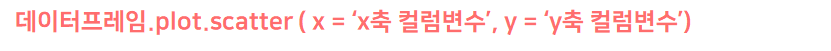

## 1.1 봉사료 데이터 셋의 식사금액과 봉사료

In [ ]:
# 1.1.1  실습을 진행하기 위해 필요한 라이브러리를 읽어들인다. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.1.2 봉사료 데이터셋을 읽어 들인다. 
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
# 1.1.3 식사비용 'total_bill'의 분포를 히스토그램으로 확인해보자. 
tips['total_bill']....;

In [ ]:
# 1.1.4 봉사료 'tip'의  분포를 히스토그램으로 확인해보자. 
... ;

In [ ]:
# 1.1.5 식사비용'total_bill'과 봉사료'tip'의 관계를 산포도로 나타내보자.
tips....(x=..., y=...,
                  figsize = (5,5));

식사 비용과 봉사료 간에 관계가 있어 보이는가?

## 1.2 봉사료 데이터 셋의 식사인원과 봉사료

In [ ]:
# 1.2.1 이번에는 식사 인원'size'의 분포를 히스토그램으로 나타내보자. 
...; 

==> 2명 테이블이 많다. 

In [ ]:
# 1.2.2 식사인원'size'와 봉사료'tip'의 관계를 산포도로 나타내보자.
tips...(x=..., y=...,
                  figsize = (5,5));

In [ ]:
# 1.2.3 식사인원'size'와 봉사료'tip'의 관계를 상자그래프로 나타내보자.
tips....(column=..., by=...,
             figsize = (5,5));

==> 식사 인원과 봉사료 간에도 유의미한 관계가 있어보인다. 같이 범주형 성격을 띤 변수의 경우, 상자그래프가 관계를 잘 보여주기도 한다. 

## 1.3 환경과 성적 데이터 셋의 각 과목점수 비교

In [ ]:
# 1.3.1 환경과 성적 데이터셋을 읽어 들인다. 
score = pd.read_csv('https://raw.githubusercontent.com/cranberrygame/data_analysis/master/StudentsPerformance.csv')
score.tail()

In [ ]:
# 1.3.2 컬럼 이름이 복잡하다. 간결하게 사용할 수 있도록 컬럼이름을 변경한다. 
# 'race/ethnicity' : 'race'
# 'parental level of education' : 'parent_edu'
# 'test preparation course' : 'test_prep'
# 'math score' : 'math'
# 'reading score' : 'reading'
# 'writing score' : 'writing'

# .rename({변경전이름:변경후이름},  axis = 'columns', inplace = True) 메소드로 컬럼명을 변경할 수 있다. 

col_change_dict = { 'race/ethnicity' : 'race',
                    'parental level of education' : 'parent_edu',
                    'test preparation course' : 'test_prep',
                    'math score' : 'math',
                    'reading score' : 'reading',
                    'writing score' : 'writing'}

score.rename(col_change_dict, axis = 'columns', inplace=True)
score.tail()

In [ ]:
# 1.3.3 math, reading, writing 과목의 분포를 히스토그램으로 확인해보자. 
#  score 데이터프레임에는 수치형 자료가 math, reading, writing 3 개만 있으므로 
# 데이터프레임에 바로 .hist 메소드를 연결하면 3 변수의 히스토그램을 작성한다. 
# 그래프 크기를 figsize = (8,8) 인수를 이용해서  전달한다. 

...;

In [ ]:
# 1.3.4  reading과 math의 관계를 산포도로 그려보자
#    향후, 다른 그림과의 비교를 위해서 x축, y축의 범위를 지정하고,
#    그래프의 이름을 달아준다. 
# 그래프 크기를 figsize = (6,6) 인수를 이용해서  전달한다. 
...

plt.xlim(0,100)
plt.ylim(0,100)
plt.title('reading - math relation')
plt.show()

==> reading 과목과 math 과목은 관계가 있어 보이는가?

In [ ]:
# 1.3.5  reading과 writing의 관계를 산포도로 그려보자
#    향후, 다른 그림과의 비교를 위해서 x축, y축의 범위를 지정하고,
#    그래프의 이름을 달아준다. 
# 그래프 크기를 figsize = (6,6) 인수를 이용해서  전달한다. 

...
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('reading -writing relation')
plt.show()

==> reading 과목은 math와 더 관련이 높을까, writing 과 더 높은가?

## 1.4 상관계수 (correlation)

* 상관계수 correlation는 두 변수간의 크기를 나타내주는 계수로서 -1 에서 1 사이의 값을 갖는다. 
* -1, 또는 1에 가까울수로 관계가 밀접하고, 0에 가까울 수록 서로 관계가 없음을 의미한다. 
* 파이썬 판다스 등에서는 corr() 함수/메소드를 이용해서 두 변수간의 관계를 구할 수 있다. 
* df.corr() : 데이터프레임의 수치형 변수 간 상관관계를 구한다. 

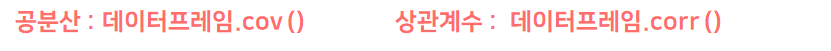

In [ ]:
# 1.4.1 환경과 시험점수 score에서 reading - math 간 상관관계와 reading-writing 간 상관관계를 구해보자. 
...

==> 교차 되는 지점의 상관계수를 읽어본다. 
- reading - math  : 0.817580
- reading - writing : 0.954598

reading - writing 의 상관계수가 더 커서, 두 변수 간의 관계가 더 크다고 할 수 있다. 

In [ ]:
# 1.4.2 score의 공분산 행렬을 구해본다. 
...

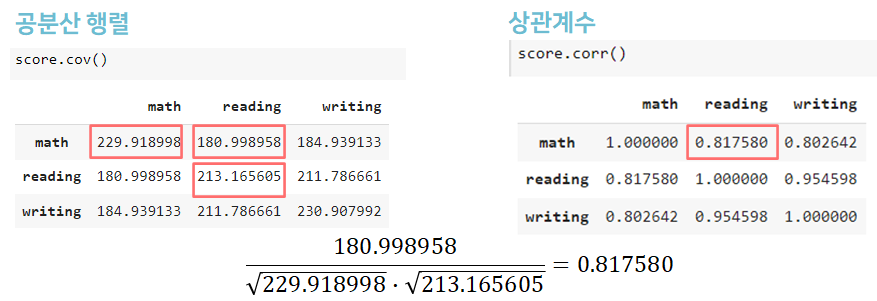

## 1.5 연습문제

In [ ]:
# 1.5.1 식사비용과 봉사료, 식사 인원간의 상관계수를 구해보자.
#     식사비용과 봉사료의 상관계수 값은 무엇인가?
...

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
# 1.5.2 식사비용과 봉사료, 식사 인원간의 공분산을 구해보자.
...

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


# **2. 시본 라이브러리를 이용한 상관관계 시각화**

seaborn 라이브러리는 데이터 간의 관계를 보다 직관적으로 이해할 수 있는 그래프를 제공한다. 
* jointplot : 각 변수의 분포와 산포도를 한 그래프에 보여준다. sns.jointplot(data=, x=, y=)

* pairplot : 데이터프레임 내 양적변수의 분포 및 각 변수간 산포도를 한 그래프에 보여준다. sns.pairplot(data = , x=, y=)

* hue 인수 : jointplot 이나 pairplot에 hue= 인수에 범주컬럼을 지정하면, 범주별 색상을 달리하여 그래프를 제공한다. 

## 2.1 조인트플롯


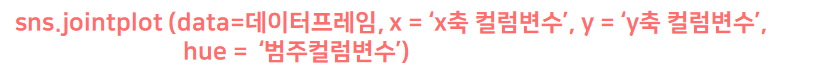

In [ ]:
# 2.1.1 시험점수 score의 reading과 math를 jointplot으로 표현해보자. 

...
plt.show();

In [ ]:
# 2.1.2 시험점수 score의 reading과 math를 jointplot으로 표현하고
#       성별로 차이가 확인되는지 hue='gender'를 추가해보자.

...
plt.show()

In [ ]:
# 2.1.3 시험점수 score의 reading과 writing를 jointplot으로 표현해보자. 

...
plt.show()

In [ ]:
# 2.1.4 시험점수 score의 reading과 writing를 jointplot으로 표현하고
#       성별로 차이가 있는지 확인해보자

...

plt.show()

## 2.2 페어플롯

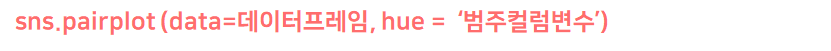

In [ ]:
# 2.2.1 score의 math, reading, writing의 관계를 한 번에 분석할 수 있도록 pairplot으로 시각화해본다. 

...;

In [ ]:
# 2.2.2 score의 math, reading, writing의 관계를 한 번에 분석할 수 있도록 pairplot으로 시각화하되,
#     성별gender 색상으로 구분하여 출력한다. (hue='gender')

...;

In [ ]:
# 2.2.3 score의 math, reading, writing의 관계를 한 번에 분석할 수 있도록 pairplot으로 시각화하되,
#     시험준비여부를 색상으로 구분하여 출력한다. (hue='test_prep')

...;

In [ ]:
# 2.2.4  score의 math, reading, writing의 관계를 한 번에 분석할 수 있도록 pairplot으로 시각화하되,
#     인종을 색상으로 구분하여 출력한다. (hue='race')

...;

## 2.3 연습문제

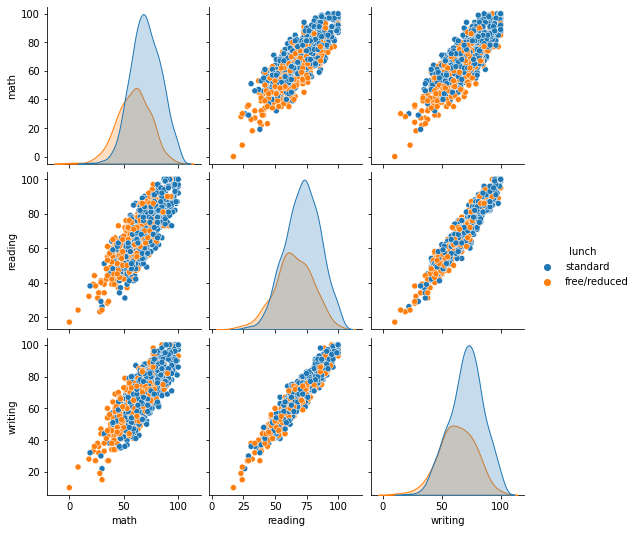

In [ ]:
# 2.3.1  score의 math, reading, writing의 관계를 한 번에 분석할 수 있도록 pairplot으로 시각화하되,
#     점심식사 권종을 색상으로 구분하여 출력한다. (hue='lunch')

...;

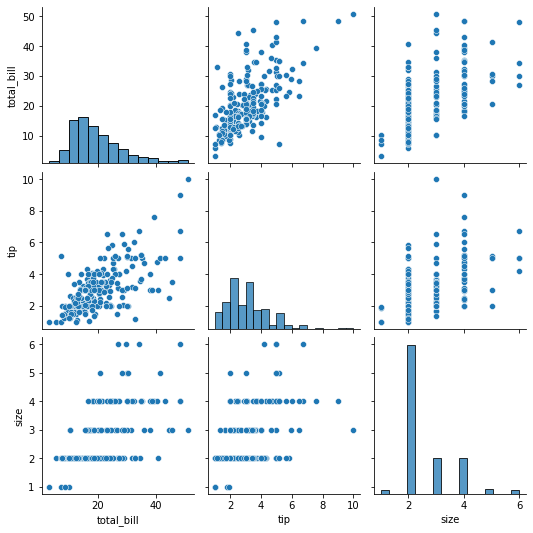

In [ ]:
# 2.3.2 봉사료 tips의 관계를 한 번에 분석할 수 있도록 pairplot으로 시각화해보자.

...;

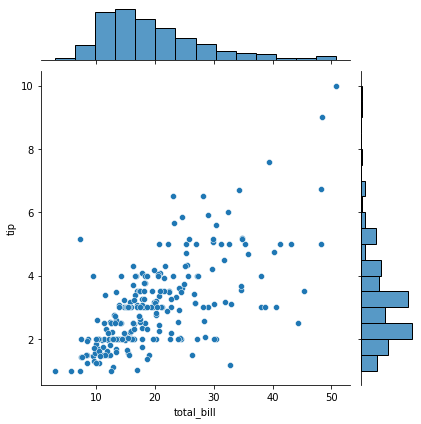

In [ ]:
# 2.3.3 봉사료 tips에서 식사비용 'total_bill'과 봉사료 'tip'의 관계를 jointplot으로 표현해보자.

...;

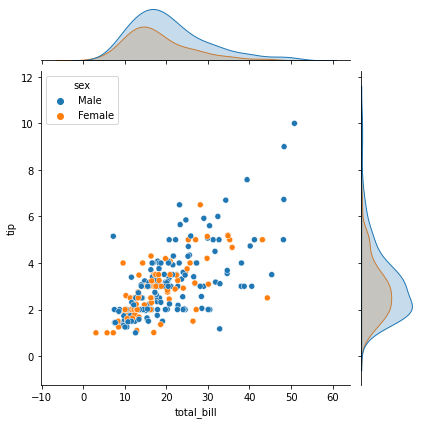

In [ ]:
# 2.3.4 봉사료 tips에서 식사비용 'total_bill'과 봉사료 'tip'의 관계를 jointplot으로 표현하되,
#      성별로 어떤 영향이 있는지, 색상을 달리하여 표기해보자. (hue = 'sex')

...;

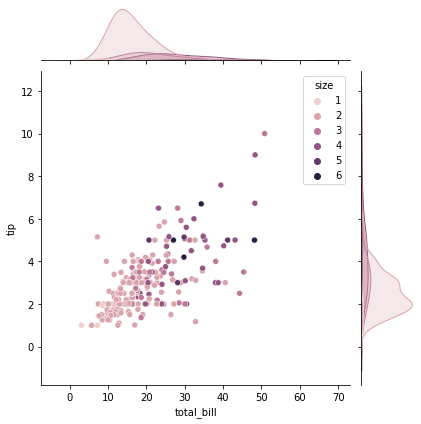

In [ ]:
# 2.3.5 봉사료 tips에서 식사비용 'total_bill'과 봉사료 'tip'의 관계를 jointplot으로 표현하되,
#      식사인원별로 어떤 영향이 있는지, 색상을 달리하여 표기해보자. (hue = 'size')

...;


# **3. 공분산과 상관계수 실험**

분산과 공분산, 상관계수의 개념을 이해하기 위해서 넘파이라이브러리를 위한 실험을 수행해본다. 
* 가상으로 자료를 다음 500개의 표본 자료를 생성해본다. 
* 키는 평균 170cm, 표준편차 10cm,  몸무게는 평균 65kg, 표준편차 7kg의 정규분포를 따른다고 가정한다.
* 키와 몸무게 두 변수간의 관계는 아래와 같이 조건을 달리하여 구성해본다. 
> 1. 서로 관계가 없는 독립적인 경우 : 각각 따로따로 난수를 발생하여 연결
>>  np.random.normal (loc = 평균값, scale = 표준편차, size = 표본개수)
> 2. 서로 영향을 미치는 공분산이 존재하는 경우 : 공분산 행렬을 반영하여 난수 발생
>> np.random.multivariate_normal(mean = 평균값들, cov = 공분산행렬, size = 표본개수)


* 각각의 경우에 대해서 , 키와 몸무게 각 변수의 히스토그램과 두 변수간의 산포도를 작성하고, 상관계수를 구해본다.
  

## 3.1 서로 관계가 없는 키와 몸무게

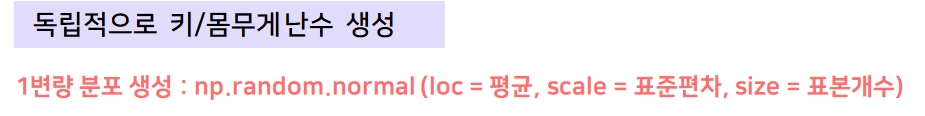

In [ ]:
# 3.1.1 numpy 라이브러리를 포함하여 필요한 라이브러리를 임포트한다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 3.1.2 평균이 170,  표준편차가 10인 난수 500개를 numpy를 이용해서 발생시켜본다. 그 결과를 height_arr에 저장해보자. 
# 또한 평균이 65, 표준편차가 7인 난수 500개를 발생시켜 weight_arr에 저장해보자. 
#  매 실행시마다 동일한 자료를 획득하기 위해서 난수의 seed 값을 우선 지정한다. 

np.random.seed(0)
height_arr = np.random.normal(loc = ..., scale = ..., size = ...)
weight_arr =  ...


In [ ]:
# 3.1.3 각각을 변수로 갖는 데이터프레임 ht_wt_ind 을 생성한다. 
ht_wt_ind = pd.DataFrame( {'height': height_arr,
                           'weight': weight_arr})
ht_wt_ind

In [ ]:
# 3.1.4 ht_wt_ind의 기술통계값을 확인해보자. 
ht_wt_ind.describe()

In [ ]:
# 3.1.5 ht_wt_ind의 분포를 히스토그램으로 시각화해보자. 
#       bins = 20 으로 지정한다. 
ht_wt_ind.hist(bins=20);

In [ ]:
# 3.1.6 ht_wt_ind 의 공분산행렬을 구해보자. 
# 공분산 값을 확인해보자. 0에 가까운 값인가?

ht_wt_ind.cov()

In [ ]:
# 3.1.7 ht_wt_ind 의 상관계수를 구해보자. 
# 상관계수의 크기가 0에 가까운 값인가?

ht_wt_ind.corr()

In [ ]:
# 3.1.8 ht_wt_ind를 jointplot을 통해 분포를 관찰해보자. x='height', y='weight'

sns.jointplot(data=ht_wt_ind, x= 'height', y='weight');

## 3.2 공분산이 존재하는 키와 몸무게

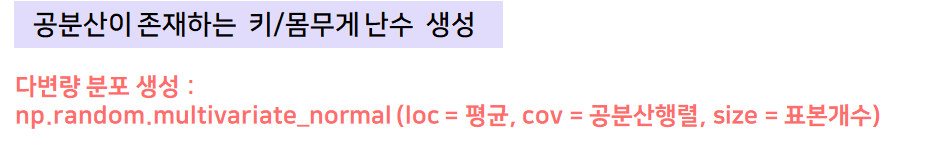

In [ ]:
# 3.2.1 이번에는 n.2.1과 동일한 평균,몸무게를 갖되, 분산이 서로에게 영향을 미치는 공분산 값을 갖는 
# 임의의 수를 만들어 본다. 


# 공분산 행렬 : 변수간에 분산과 공분산 값을 행렬형태로 나타낸다. 
#   키와 몸무게의 공분산은 6*6 = 36 으로 가정한다. 
#  500개의 난수를 발생 시킨다. 

# np.random.multivariate_nomral() 함수를 이용해서 각 변수간의 관계를 갖는 표본을 생성할 수 있다. 
#  매 실행시마다 동일한 자료를 획득하기 위해서 난수의 seed 값을 우선 지정한다. 

np.random.seed(0)
means = [170, 65]
cov_mat = [[100,36],[36,49]]
ht_wt_related_arr = np.random.multivariate_normal(mean = ..., 
                                              cov=...,
                                              size = ...)

ht_wt_related_arr[-5:]   # 슬라이스를 이용해서 마지막 5개만 출력한다. 

In [ ]:
# 3.2.2 생성된 배열을 데이터프레임으로 변경한다. 
ht_wt_related = pd.DataFrame(ht_wt_related_arr, columns =['height','weight'])
ht_wt_related.tail()

In [ ]:
# 3.2.3 ht_wt_related의 기술통계값을 확인해보자.  
ht_wt_related.describe()

In [ ]:
# 3.2.4 ht_wt_related의 공분산을 살펴보자.
# cov = [[100,36],[36,49]] 와 비슷하게 분포가 생성되었는가? 
ht_wt_related_cov = ht_wt_related.cov()
ht_wt_related_cov

In [ ]:
# 3.2.5 ht_wt_related의 상관계수를 구해보자. 
ht_wt_related_corr = ht_wt_related.corr()
ht_wt_related_corr

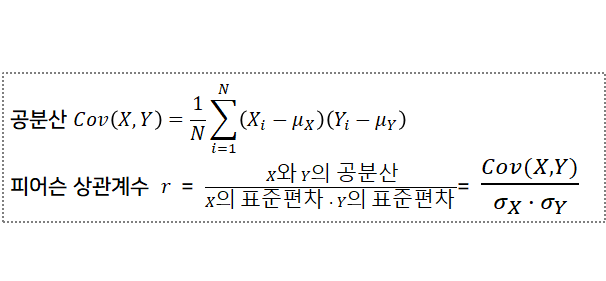

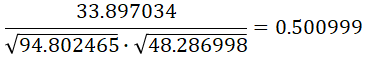

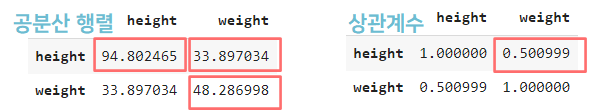

In [ ]:
# 3.2.6 ht_wt_related의 공분산 ht_wt_related_cov에서 상관계수를 구해보자. 

ht_var = ht_wt_related_cov.loc['height','height'] 
wt_var = ht_wt_related_cov.loc['weight','weight'] 
ht_wt_cov = ht_wt_related_cov.loc['height','weight']
r_square =  ...

print ('분포 생성에 입력한 평균 :', means)
print ('분포 생성에 입력한 공분산 :', cov_mat)
print ('생성된 데이터의 height 분산 :', ht_var)
print ('생성된 데이터의 weight 분산 :', wt_var)
print ('생성된 데이터의 height-weight 공분산 :', ht_wt_cov)
print ('생성된 데이터의 공분산에서 계산한 상관계수 R square:', r_square)


In [ ]:
# 3.2.7 ht_wt_related를 jointplot을 통해 분포를 관찰해보자. x='height', y='weight'
sns.jointplot(data=ht_wt_related, x='height', y='weight');

## 3.3 공분산 변화에 따른 상관계수의 변화


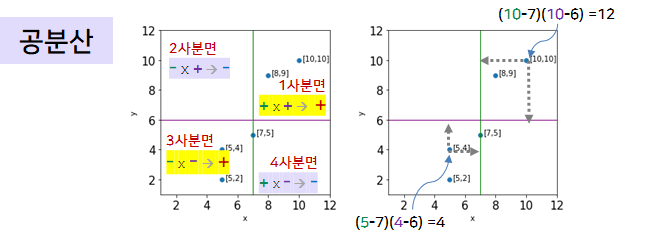

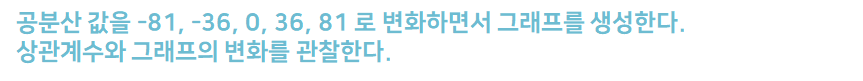

In [ ]:
# 3.3.1 [참고] 공분산 covariance의 값을 -81, -36, 0, 36, 81 로 변경하면서 상관계수와 산포도를 작성해 보았다. 
# 함께 변동하는 공분산이 클수록 상관관계가 높은 것으로 나타난다. 

# 5개의 그래프 영역 생성
fig, ax = plt.subplots(1,5,figsize = (16,3), sharex=True, sharey=True)

# 분포의 조건 : 평균, 표준편차, 공분산
means = [170,65]
vars = [100, 49]
covs = [-81, -36, 0, 36, 81]  # 공분산을 변화시킨다. 

# 좌측 그래프부터 공분산의 값을 변화 시키며, 상관관계와 산포도를 구한다. 
for c, axe in zip (covs, ax.flat) :
  np.random.seed(0)   # 고정값

  # 난수 생성
  arr = np.random.multivariate_normal(mean = means,
                                      cov = [[vars[0], c],[c, vars[1]]],
                                      size = 100)
  
  # 데이터프레임으로 변환
  df = pd.DataFrame (arr, columns =['heights','weights'])

  # 산포도 그리기
  df.plot.scatter(x='heights', y='weights', ax = axe)

  # 그래프별 제목에 공분산과 상관계수 표기
  axe.set_title(f'cov:{c} & corr:{df.corr().iloc[1,0].round(2)}')



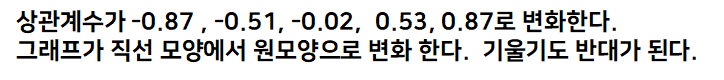

# **4. 사례) 날씨와 자전거대여량**

Kaggle은 데이터 분석관련 다양한 대회를 개최하고 교육자료나 데이터셋을 제공한다. 
Kaggle에서 공공자전거 대여건수를 시간대별로 예측한 예제를 가공한 자료로 학습해본다. 

* 표본 추출 조건 : 2011년 1월~12월 까지의 데이터 중, 휴일(주말+공휴일) 정오(12:00)의 시간당 대여 건수
* 변수 목록


> * weather : 1 - 맑음,  2 - 안개와 약한 비,눈,  3- 강한 비, 눈
> * atemp : 체감온도 (섭씨)
> * humidity : 습도
> * windspeed : 풍속
> * count : 대여건수

우선 자전거 대여건수 자료를 간단하게 기술 분석을 수행하고, 변수간의 상관관계를 관찰해보자



## 4.1 자전거대여량 기술분석

In [ ]:
# 4.1.1 관련 라이브러리를 읽어들인다. (앞에서 이미 읽어 들였다면, 생략하여도 무방하다.)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 4.1.2  자전거 대여량 관련 자료를 읽어들인다.  (수업용으로 편집된 자료를 github로 부터 읽어들인다. )
bike = pd.read_csv('https://github.com/sagelab4data/khcumr/blob/main/bikerent_nonworking_noon.csv?raw=true')
bike

In [ ]:
# 4.1.3  [step1] 자료형 및 자료 건수를 확인해본다.
# 질적변수가 존재하는가? 양적변수의 자료형은 어떻게 되는가?
# 누락값이 존재하는가?
...

In [ ]:
# 4.1.4 [step2] 성격상 질적변수에 해당하는 항목의 개수를 세어보고 도식화 해본다. 
#  날씨별 자료의 분포는 비슷한가?

cnt = bike['weather']....
display(cnt)
cnt.plot(kind='bar');

In [ ]:
cnt.plot(kind=...);

In [ ]:
# 4.1.5 [step3] 양적변수의 기술요약값을 확인해보자. 

bike....

In [ ]:
# 4.1.6 [step4] 양적변수의 분포를 상자그래프로 비교해보자. 
bike.... ;

In [ ]:
# 4.1.7 [step5] 양적변수의 분포를 히스토그램으로 비교해보자. 
bike....;

## 4.2 자전거대여량 상관분석

In [ ]:
# 4.2.1 자전거대여량 bike의 변수간 관계를 한 번에 분석할 수 있도록 pairplot으로 시각화해본다. 
# 양의 상관관계가 존재하는가?
# 음의 상관관계가 존재하는가?
qual_var = ['atemp','humidity','windspeed','count']
sns.pairplot(data= ... );

In [ ]:
# 4.2.2 각 변수간의 상관계수를 구해보고 페어플롯 그래프와 비교해보자. 
#      대여건수와의 관계가 확인되는가?
...

In [ ]:
# 4.2.3 위에서 작성한 페어플롯을 날씨(weather)별로 색상을 달리하여 표시해보자.
# 날씨와 습도가 관계가 있는가?
# 날씨와 풍속은 관계가 있는가?
# 날씨와 기온은 관계가 있는가?

... ;

In [ ]:
# 4.2.4 체감온도와 대여건수간의 관계를 날씨별로 jointplot으로 시각화 해보자. 
sns.jointplot(data=..., 
              x = ...,
              y=...,
              hue = ...);

In [ ]:
# 4.2.5 습도와 대여건수간의 관계를 날씨별로 jointplot으로 시각화 해보자. 
sns.jointplot(data=..., 
              x = ...,
              y=...,
              hue = ...);

## 4.3 연습문제

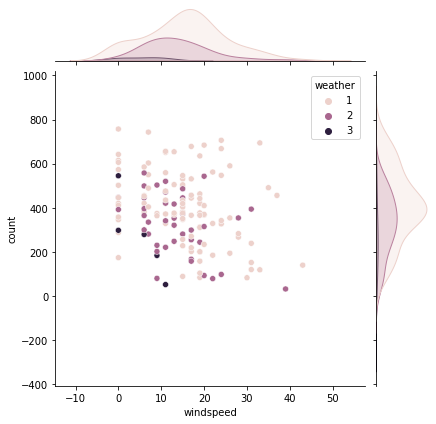

In [ ]:
# 4.3.1 풍속과 대여건수간의 관계를 날씨별로 jointplot으로 시각화 해보자. 
sns.jointplot(data=..., 
              x = ..., 
              y=..., 
              hue = ...);